<a href="https://colab.research.google.com/github/CHAITANYA2605/Siamese-Neural-Network/blob/main/Siamese_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 767ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 710ms/step
Similarity score: -0.052438866
Differences: 203.6052


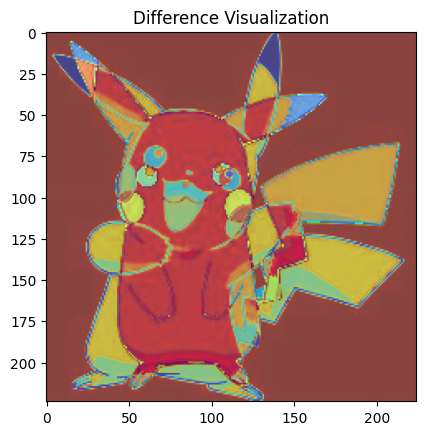

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Define the Siamese network architecture using VGG16 as the backbone
def create_siamese_model(input_shape):
    base_model = VGG16(input_shape=input_shape, weights='imagenet', include_top=False)
    x = base_model.output
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(128)(x)
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

# Create the Siamese network
input_shape = (224, 224, 3)  # Adjust input shape as needed
model1 = create_siamese_model(input_shape)
model2 = create_siamese_model(input_shape)

# Define the contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1.0
    square = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square + (1 - y_true) * margin_square)

# Compile the Siamese network
optimizer = Adam(learning_rate=0.001)
model1.compile(loss=contrastive_loss, optimizer=optimizer)
model2.compile(loss=contrastive_loss, optimizer=optimizer)

# Train the Siamese network (assuming you have training data)
# ...

# Function to compare two images and return similarity score, differences, and visualization
def compare_images(image_path1, image_path2):
    # Load images
    image1 = cv2.imread(image_path1)
    image2 = cv2.imread(image_path2)

    # Resize images if necessary (if they have different dimensions)
    image1 = cv2.resize(image1, (224, 224))
    image2 = cv2.resize(image2, (224, 224))

    # Preprocess images
    image1 = preprocess_input(image1)
    image2 = preprocess_input(image2)

    # Get embeddings
    embedding1 = model1.predict(np.expand_dims(image1, axis=0))
    embedding2 = model2.predict(np.expand_dims(image2, axis=0))

    # Calculate similarity (cosine similarity)
    def cosine_similarity(vector1, vector2):
        dot_product = np.dot(vector1, vector2)
        norm1 = np.linalg.norm(vector1)
        norm2 = np.linalg.norm(vector2)
        similarity = dot_product / (norm1 * norm2)
        return similarity

    similarity_score = cosine_similarity(embedding1[0], embedding2[0])

    # Calculate differences (e.g., Euclidean distance between embeddings)
    differences = np.linalg.norm(embedding1 - embedding2)

    # Visualize differences using heatmaps
    heatmap = np.abs(image1 - image2)
    heatmap = np.uint8(heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    heatmap = cv2.resize(heatmap, (image1.shape[1], image1.shape[0]))

    # Overlay heatmap on the original image
    alpha = 0.5
    result = cv2.addWeighted(np.uint8(image1), 1 - alpha, heatmap, alpha, 0)

    return similarity_score, differences, result

# Example usage
image_path1 = "/content/OIP.jpg"
image_path2 = "/content/OIP (1).jpg"

similarity_score, differences, result = compare_images(image_path1, image_path2)

print("Similarity score:", similarity_score)
print("Differences:", differences)

# Display the result image
plt.imshow(result)
plt.title("Difference Visualization")
plt.show()